## Linear Regression in Python using scikit-learn
- Generate synthetic linear data.

- Fit a Linear Regression model using scikit-learn.

- Visualize the original data and the fitted regression line.

- Display the regression equation on the plot.

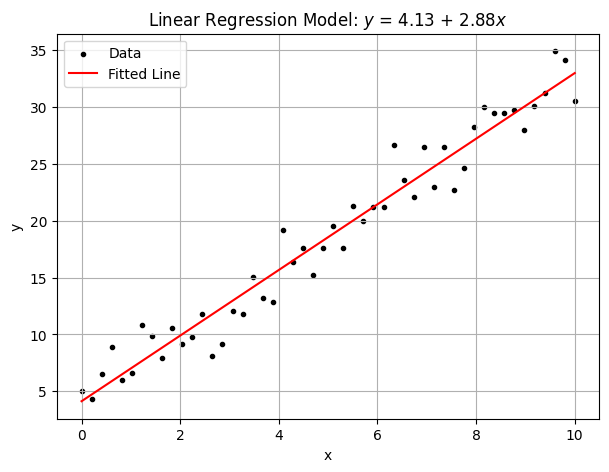

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic linear data
# Let's assume a true model: y = 3x + 4 + noise
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3 * X + 4 + np.random.randn(50) * 2  # Add some noise

# Step 2: Instantiate and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Step 3: Predict values for the regression line
X_MIN, X_MAX = X.min(), X.max()
X_hat = np.linspace(start=X_MIN, stop=X_MAX, num=2)
y_hat = linear_regression.predict(X_hat.reshape(-1, 1))

# Step 4: Prepare regression equation string
model = "$y$ = {:.2f} + {:.2f}$x$".format(linear_regression.intercept_[0], linear_regression.coef_[0][0])

# Step 5: Plot the data and regression line
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y, color="black", marker=".", label="Data")
ax.plot(X_hat, y_hat, color="red", label="Fitted Line")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear Regression Model: " + model)
ax.legend()
plt.grid(True)
plt.show()

## Working with advertising dataset

In [3]:
import pandas as pd

data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


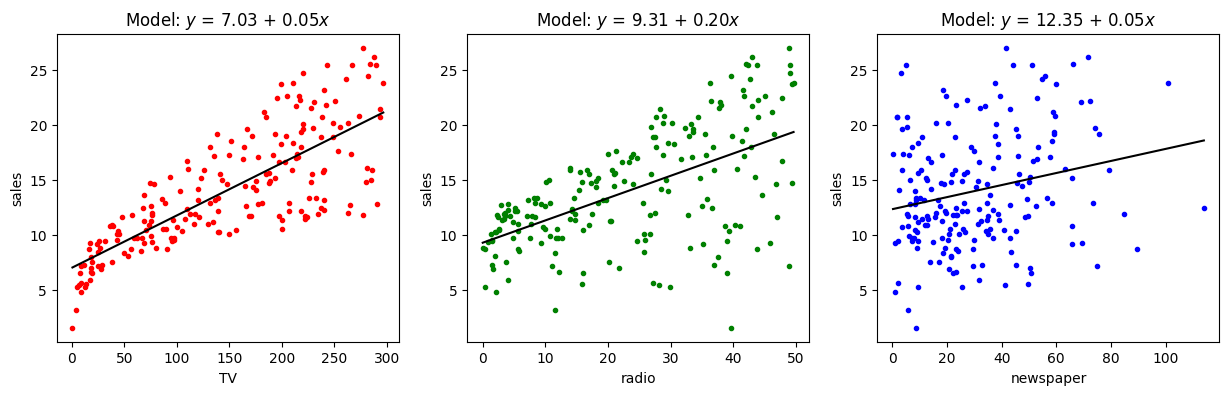

In [4]:
import matplotlib as mpl

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):
  
    
    LR_feature = LinearRegression()
    LR_feature.fit(data_df[[feature]], data_df[["sales"]])

    # Predictions
    X_hat = np.linspace(start=data_df[feature].min(), stop=data_df[feature].max(), num=2)
    y_hat = LR_feature.predict( X_hat.reshape(-1,1) )

    # Plot of sales vs TV
    model = "$y$ = {:.2f} + {:.2f}$x$".format(LR_feature.intercept_[0], *LR_feature.coef_[0])
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X_hat, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title("Model: " + model)
    return ax

# Train model using features data to predict sales
features = ["TV", "radio", "newspaper"]
colors = ["red", "green", "blue"]

for ax, feature, color in zip(gs, features, colors):
    axes = fig.add_subplot(ax)
    train_plot(data_df, feature, axes, color)

plt.show()

In [5]:
from IPython.display import display, HTML

# Training Linear Regression using TV and Radio features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio"]], data_df[["sales"]])

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

print("")

# Training Linear Regression using all features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio", "newspaper"]], data_df[["sales"]])
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

## Performance Metrics for Linear Regression

In [6]:
# Import LinearRegression and necessary evaluation metrics from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

# Create a dictionary of lists for storing the values of all evaluation metrics
results = {
    "Residual Sum of Squares":list(),
    "Mean Squared Error":list(),
    "Root Mean Squared Error":list(),
    "Mean Absolute Error":list(),
}


# Train a linear regression model
def train_lr(X,y_true):
    linear_regression = LinearRegression()
    linear_regression.fit(X,y_true)
    y_pred = linear_regression.predict(X)

    # Evaluate different metrics
    results["Residual Sum of Squares"].append( len(y_true) * mean_squared_error(y_true, y_pred) )
    results["Mean Squared Error"].append( mean_squared_error(y_true, y_pred) )
    results["Root Mean Squared Error"].append( np.sqrt(mean_squared_error(y_true, y_pred)) )
    results["Mean Absolute Error"].append( median_absolute_error(y_true, y_pred) )



# Train and analyze performance metric over each of the following feature groups
feature_list = ["TV",
                "radio",
                "newspaper",
                "TV, radio",
                "TV, radio, newspaper"]

# Train the combination of features in feature_list
for features in feature_list:
    feature =  features.split(", ")
    train_lr(data_df[feature], data_df[["sales"]])


In [7]:
feature_list = ["TV", "radio", "newspaper", "TV + radio", "TV + radio + newspaper"]
error_df = pd.DataFrame(results, index=feature_list).transpose()
display(error_df)

,TV,radio,newspaper,TV + radio,TV + radio + newspaper
Residual Sum of Squares,2102.530583,3618.479549,5134.804544,556.913980,556.825263
Mean Squared Error,10.512653,18.092398,25.674023,2.784570,2.784126
Root Mean Squared Error,3.242322,4.253516,5.066954,1.668703,1.668570
Mean Absolute Error,2.026365,2.614170,3.440421,1.079819,1.075512


### From above performance metrices, we are clear that Tv, radio and newspaper combinations are best however if using TV + radio then it works even fine.

## Polynomial Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display, clear_output

def animate_polynomial_regression(x, y, models, _FROM, _TO):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.set_ylim(min(y) - 1, max(y) + 1)
    ax.set_xlim(_FROM - 0.5, _TO + 0.5)

    ax.scatter(x, y, c='blue', label='Data')

    x_plot = np.linspace(_FROM - 0.2, _TO + 0.2, 300).reshape(-1, 1)
    line, = ax.plot([], [], c='red', linewidth=2, label='Polynomial Fit')

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        degree, model, transformer = models[frame]
        x_trans = transformer.transform(x_plot)
        y_pred = model.predict(x_trans)

        line.set_data(x_plot, y_pred)
        ax.set_title(f'Polynomial Regression (degree = {degree})', fontsize=14)
        return line,

    anim = animation.FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=len(models),
        interval=1500,
        blit=True
    )

    # Save as GIF using Pillow
    gif_path = "poly_regression.gif"
    anim.save(gif_path, writer='pillow', fps=1)

    clear_output(wait=True)
    display(Image(filename=gif_path))
    plt.close()

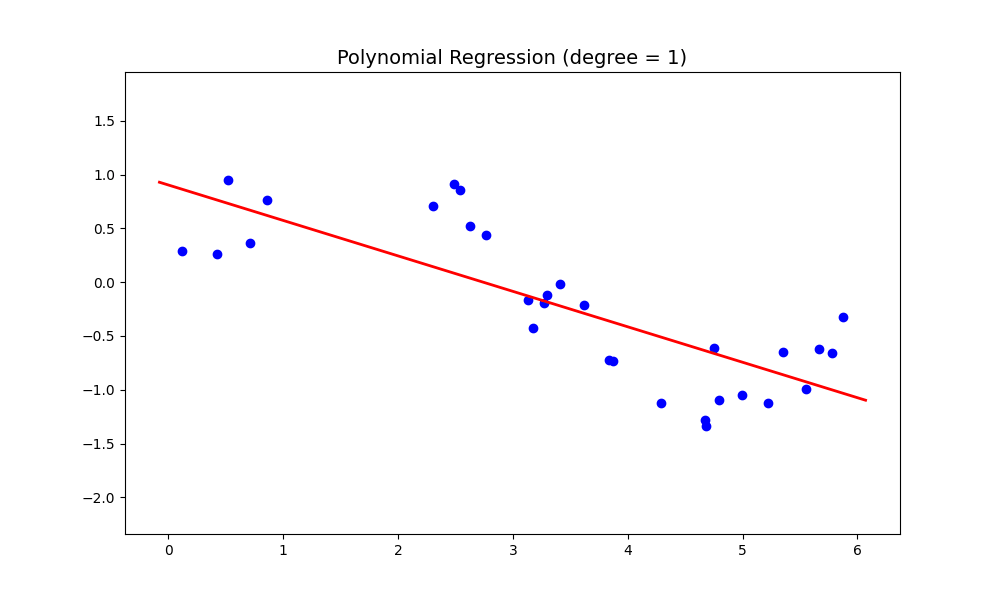

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
np.random.seed(0)
x = np.sort(6 * np.random.rand(30, 1), axis=0)
y = np.sin(x).ravel() + np.random.normal(0, 0.2, x.shape[0])

# Train models
degrees = [1, 2, 3, 5, 10]
models = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    x_poly = poly.fit_transform(x)
    model = LinearRegression().fit(x_poly, y)
    models.append((deg, model, poly))

# Animate
animate_polynomial_regression(x, y, models, _FROM=min(x)[0], _TO=max(x)[0])